# Niloufar Baba Ahmadi 610398103 MiniProject2 Q1

### Imports

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

### Reading the train set

In [ ]:
df_train = pd.read_csv('/MiniProject2/Dataset/Problem 1/train_set.csv')
df_train.head(10)

,x,target
0,2.391265,0.692274
1,4.214828,4.078137
2,2.801953,2.614283
3,2.448590,1.465649
4,4.671812,-1.863850
5,2.160994,2.873959
6,1.866917,3.079308
7,4.127216,0.430335
8,5.079675,1.275446
9,5.957740,-2.831369


### Reading the test set

In [ ]:
df_test = pd.read_csv('/MiniProject2/Dataset/Problem 1/test_set.csv')
df_test.head(10)

,x,target
0,1.143986,0.910291
1,5.597518,-0.633189
2,2.213371,0.800556
3,2.269057,0.765961
4,2.974509,0.166308
5,0.166383,0.165616
6,6.127458,-0.155099
7,5.620789,-0.615008
8,5.589010,-0.639752
9,0.310713,0.305738


### Add $ x_{0} $

according to the formula of regression we have:

$ f_{w,b}(x^i) = w x^i + b $

where,

$ b = w x^0$

So to find the weight for $x^0$ s or in other words the value of bias, we must have a column with the value one since from math we know that $x^0 = 1$. That is why we added a column that has only the value 1.

In [ ]:
one_ls = []

for i in range(df_test.shape[0]):

    one_ls.append(1)

df_test['x_0'] = one_ls

for i in range(100):

    one_ls.append(1)

df_train['x_0'] = one_ls

df_train.head(10)

,x,target,x_0
0,2.391265,0.692274,1
1,4.214828,4.078137,1
2,2.801953,2.614283,1
3,2.448590,1.465649,1
4,4.671812,-1.863850,1
5,2.160994,2.873959,1
6,1.866917,3.079308,1
7,4.127216,0.430335,1
8,5.079675,1.275446,1
9,5.957740,-2.831369,1


### Plotting the train set

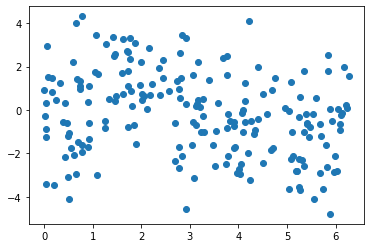

In [ ]:
plt.scatter(x = df_train['x'], y = df_train['target'])
plt.show()

### Plotting the test set

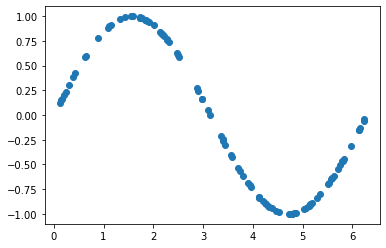

In [ ]:
plt.scatter(x = df_test['x'], y = df_test['target'])
plt.show()

### optimal linear weight vector
We need to calculate the optimal linear weight vector. Considering that our cost function will be MSE, we have the formula below for calculating the weights. 

$w = (X^TX)^{-1}X^TY$

In [ ]:
def weight(mat_x, mat_y):

    mat_x_t = np.transpose(mat_x)

    temp = np.dot(mat_x_t, mat_x)
    temp = inv(temp)
    temp = np.dot(temp, mat_x_t)
    temp = np.dot(temp, mat_y)

    return temp

### Calculating Cost

We will calculate MSE loss which is found using the formula below:

$J(w,b)= \frac{1}{2m} \sum _{i=0} ^{m-1} cost^{(i)} $

where,

$cost^{(i)} = (f_{w,b} - y^{(i)})^2$

and

$ f_{w,b}(x^i) = w x^i + b $


In [ ]:
def compute_cost(x, y, w): 
    
    m = x.shape[0] 
    total_cost = 0 

    f_wb = np.dot(x, w)
    cost_i = np.subtract(f_wb, y)
    cost_i = np.power(cost_i, 2)
    total_cost = np.sum(cost_i)

    total_cost = total_cost / (2 * m)

    return total_cost

### Poly plot

This function will help us illustrate the polynomial regression's line (with degree 5) and it will also illustrate the df passed to it. (be it the test data frame or the train data frame.)

In [ ]:
def poly_plot(n, df, w):

    df_poly = pd.DataFrame()
    df_poly['x_0'] = np.ones(n)
    df_poly['x_1'] = np.linspace(df['x'].min(), df['x'].max(), n)

    two_ls = []
    three_ls = []
    four_ls = []
    five_ls = []

    for i in range(n):

        x = df_poly['x_1'][i]

        two_ls.append(x**2)
        three_ls.append(x**3)
        four_ls.append(x**4)
        five_ls.append(x**5)

    df_poly['x_2'] = two_ls
    df_poly['x_3'] = three_ls
    df_poly['x_4'] = four_ls
    df_poly['x_5'] = five_ls

    df_poly.head(10)

    x = df_poly[['x_1', 'x_0', 'x_2', 'x_3', 'x_4', 'x_5']].to_numpy()
    regression_line = np.dot(x, w)

    fig, ax = plt.subplots()

    predicted = np.dot(x, w)

    # ax.plot(df_train['x'], predicted, c = "b")
    ax.plot(df_poly['x_1'], regression_line, color = "r") 
    ax.scatter(x = df['x'], y = df['target'])

    plt.show()

### Linear Regression

Calculating the weight array for the linear regression model and calculating its cost.

In [ ]:
print('Linear Regression')

x = df_train[['x', 'x_0']].to_numpy()
y = df_train[['target']].to_numpy()

w_ls = weight(x, y)
# print(w_ls)
print('bias = ', w_ls[1]) #because x_1 was passed before x_0  
print('w_1 = ', w_ls[0])

cost_ls = []
cost_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_ls[0])

Linear Regression
bias =  [0.6421799]
w_1 =  [-0.26644821]
Cost =  1.7168853950646872


Here is a demonstration of how the model fits our data. As it is clear from our cost (which is relatively high), linear regression is not a good fit for this data.

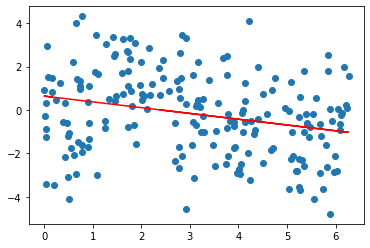

In [ ]:
fig, ax = plt.subplots()

predicted = np.dot(x, w_ls)

ax.plot(df_train['x'], predicted, c = "r")
ax.scatter(x = df_train['x'], y = df_train['target'])

plt.show()

### Linear Regression on test set

In [ ]:
x = df_test[['x', 'x_0']].to_numpy()
y = df_test[['target']].to_numpy()

cost_test_ls = []
cost_test_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_test_ls[0])

Cost =  0.1264746726391258


Demonstration of how the model fits our test data.

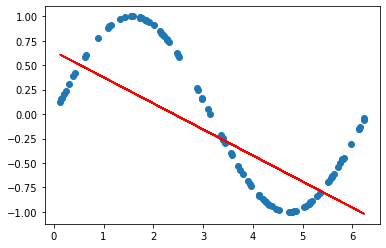

In [ ]:
fig, ax = plt.subplots()

predicted = np.dot(x, w_ls)

ax.plot(df_test['x'], predicted, c = "r")
ax.scatter(x = df_test['x'], y = df_test['target'])

plt.show()

As you can see the model fails to fit on both the test and train set which is due to the nature of the data. This is a polynomial data and a linear model is not capable of fitting the data. In other words, the model is at its capacity.

Note that:

- Models with Low capacity struggle to fit on the training set. 

### Polynomial Regression

Here we will find weights array for a polynomial regression with degree 5 to fit on our data.

In [ ]:
two_ls = []
three_ls = []
four_ls = []
five_ls = []

for i in range(df_train.shape[0]):

    x = df_train['x'][i]

    two_ls.append(x**2)
    three_ls.append(x**3)
    four_ls.append(x**4)
    five_ls.append(x**5)

df_train['x_2'] = two_ls
df_train['x_3'] = three_ls
df_train['x_4'] = four_ls
df_train['x_5'] = five_ls

df_train.head(10)

,x,target,x_0,x_2,x_3,x_4,x_5
0,2.391265,0.692274,1,5.718149,13.673611,32.697231,78.187750
1,4.214828,4.078137,1,17.764775,74.875471,315.587233,1330.145907
2,2.801953,2.614283,1,7.850938,21.997957,61.637233,172.704606
3,2.448590,1.465649,1,5.995595,14.680758,35.947165,88.019886
4,4.671812,-1.863850,1,21.825832,101.966195,476.366944,2225.497044
5,2.160994,2.873959,1,4.669896,10.091619,21.807932,47.126817
6,1.866917,3.079308,1,3.485378,6.506910,12.147860,22.679042
7,4.127216,0.430335,1,17.033912,70.302634,290.154155,1197.528871
8,5.079675,1.275446,1,25.803095,131.071329,665.799715,3382.045965
9,5.957740,-2.831369,1,35.494666,211.467991,1259.871308,7505.985686


Polynomial Regression


Training on 10 first elements
bias =  [286.01162618]
w_1 =  [-421.97369164]
w_2 =  [239.92813709]
w_3 =  [-65.31049995]
w_4 =  [8.54769463]
w_5 =  [-0.43283447]
Cost =  2684.6837172483274


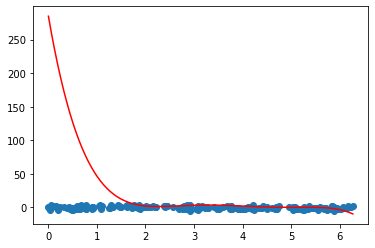



Training on 20 first elements
bias =  [1.76313319]
w_1 =  [-0.27787558]
w_2 =  [-0.25840934]
w_3 =  [0.36348737]
w_4 =  [-0.10893376]
w_5 =  [0.00895486]
Cost =  2.4800260824903186


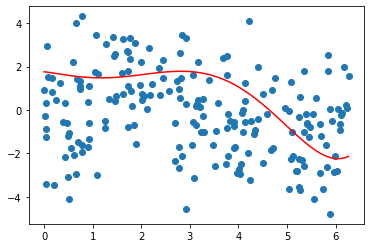



Training on 50 first elements
bias =  [-1.3466947]
w_1 =  [2.99797164]
w_2 =  [-1.06879844]
w_3 =  [0.13297118]
w_4 =  [-0.01798626]
w_5 =  [0.00195297]
Cost =  1.6057003225300541


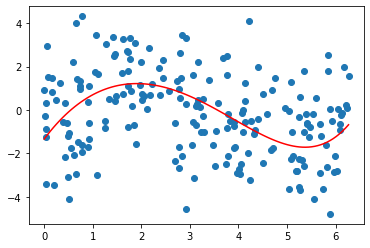



Training on 100 first elements
bias =  [-0.45145294]
w_1 =  [0.58160111]
w_2 =  [0.97851162]
w_3 =  [-0.62673533]
w_4 =  [0.10661027]
w_5 =  [-0.00536244]
Cost =  1.553864317289819


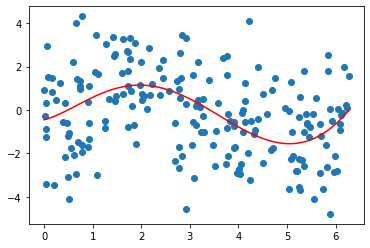



Training on 200 first elements
bias =  [-0.50717654]
w_1 =  [0.41741085]
w_2 =  [1.17048501]
w_3 =  [-0.73986671]
w_4 =  [0.13511055]
w_5 =  [-0.00772431]
[[-421.97369164]
 [ 286.01162618]
 [ 239.92813709]
 [ -65.31049995]
 [   8.54769463]
 [  -0.43283447]]
Cost =  1.544783190913977


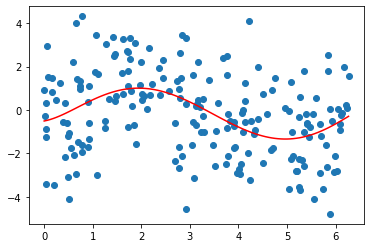

In [ ]:
print('Polynomial Regression')
print('\n')

e10 = []
e25 = []
e50 = []
e100 = []
e200 = []

x = df_train[['x', 'x_0', 'x_2', 'x_3', 'x_4', 'x_5']].to_numpy()
y = df_train[['target']].to_numpy()

###########################################

print('Training on 10 first elements')

w_ls = weight(x[:10], y[:10])
# print(w_ls)
print('bias = ', w_ls[1])
print('w_1 = ', w_ls[0])
print('w_2 = ', w_ls[2])
print('w_3 = ', w_ls[3])
print('w_4 = ', w_ls[4])
print('w_5 = ', w_ls[5])

e10 = w_ls[:]
# print(e10)

cost_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_ls[1])

poly_plot(100, df_train, e10)

############################################

print('\n')
print('Training on 20 first elements')

w_ls = weight(x[:20], y[:20])
# print(w_ls)
print('bias = ', w_ls[1])
print('w_1 = ', w_ls[0])
print('w_2 = ', w_ls[2])
print('w_3 = ', w_ls[3])
print('w_4 = ', w_ls[4])
print('w_5 = ', w_ls[5])

e20 = w_ls[:]
# print(e10)

cost_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_ls[2])

poly_plot(100, df_train, e20)

############################################

print('\n')
print('Training on 50 first elements')

w_ls = weight(x[:50], y[:50])
# print(w_ls)
print('bias = ', w_ls[1])
print('w_1 = ', w_ls[0])
print('w_2 = ', w_ls[2])
print('w_3 = ', w_ls[3])
print('w_4 = ', w_ls[4])
print('w_5 = ', w_ls[5])

e50 = w_ls[:]
# print(e10)

cost_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_ls[3])

poly_plot(100, df_train, e50)

############################################

print('\n')
print('Training on 100 first elements')

w_ls = weight(x[:100], y[:100])
# print(w_ls)
print('bias = ', w_ls[1])
print('w_1 = ', w_ls[0])
print('w_2 = ', w_ls[2])
print('w_3 = ', w_ls[3])
print('w_4 = ', w_ls[4])
print('w_5 = ', w_ls[5])

e100 = w_ls[:]
# print(e10)

cost_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_ls[4])

poly_plot(100, df_train, e100)

############################################

print('\n')
print('Training on 200 first elements')

w_ls = weight(x[:200], y[:200])
# print(w_ls)
print('bias = ', w_ls[1])
print('w_1 = ', w_ls[0])
print('w_2 = ', w_ls[2])
print('w_3 = ', w_ls[3])
print('w_4 = ', w_ls[4])
print('w_5 = ', w_ls[5])

e200 = w_ls[:]
print(e10)

cost_ls.append(compute_cost(x, y, w_ls))
print('Cost = ', cost_ls[5])

poly_plot(100, df_train, e200)

### Polynomial Regression on the test set

In [ ]:
two_ls = []
three_ls = []
four_ls = []
five_ls = []

for i in range(df_test.shape[0]):

    x = df_test['x'][i]

    two_ls.append(x**2)
    three_ls.append(x**3)
    four_ls.append(x**4)
    five_ls.append(x**5)

df_test['x_2'] = two_ls
df_test['x_3'] = three_ls
df_test['x_4'] = four_ls
df_test['x_5'] = five_ls

df_test.head(10)

,x,target,x_0,x_2,x_3,x_4,x_5
0,1.143986,0.910291,1,1.308704,1.497139,1.712706,1.959312
1,5.597518,-0.633189,1,31.332212,175.382635,981.707524,5495.125928
2,2.213371,0.800556,1,4.899010,10.843326,24.000302,53.121567
3,2.269057,0.765961,1,5.148620,11.682512,26.508284,60.148808
4,2.974509,0.166308,1,8.847701,26.317561,78.281810,232.849908
5,0.166383,0.165616,1,0.027683,0.004606,0.000766,0.000128
6,6.127458,-0.155099,1,37.545742,230.059954,1409.682708,8637.771586
7,5.620789,-0.615008,1,31.593264,177.579061,998.134361,5610.302237
8,5.589010,-0.639752,1,31.237035,174.584107,975.752357,5453.489874
9,0.310713,0.305738,1,0.096543,0.029997,0.009321,0.002896




10 first elements
Cost =  1710.7262496370392


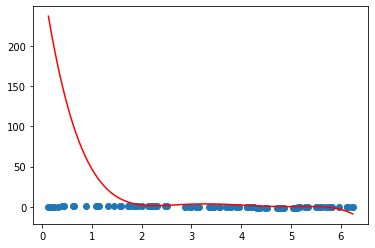



20 first elements
Cost =  0.8554113305886015


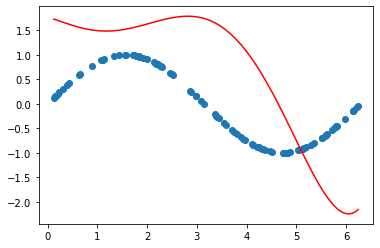



50 first elements
Cost =  0.17639118492221062


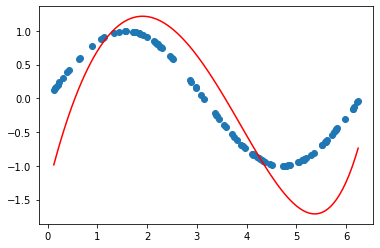



100 first elements
Cost =  0.07618086265995631


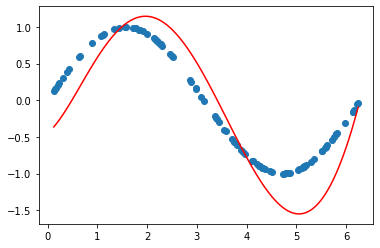



200 first elements
Cost =  0.04807775167361938


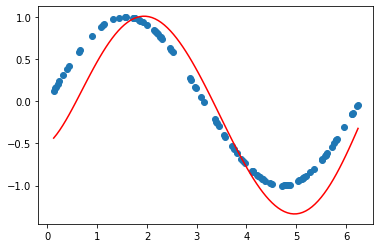

In [ ]:
x = df_test[['x', 'x_0', 'x_2', 'x_3', 'x_4', 'x_5']].to_numpy()
y = df_test[['target']].to_numpy()

print('\n')
print('10 first elements')

cost_test_ls.append(compute_cost(x, y, e10))
print('Cost = ', cost_test_ls[1])
poly_plot(100, df_test, e10)

print('\n')
print('20 first elements')

cost_test_ls.append(compute_cost(x, y, e20))
print('Cost = ', cost_test_ls[2])
poly_plot(100, df_test, e20)

print('\n')
print('50 first elements')

cost_test_ls.append(compute_cost(x, y, e50))
print('Cost = ', cost_test_ls[3])
poly_plot(100, df_test, e50)

print('\n')
print('100 first elements')

cost_test_ls.append(compute_cost(x, y, e100))
print('Cost = ', cost_test_ls[4])
poly_plot(100, df_test, e100)

print('\n')
print('200 first elements')

cost_test_ls.append(compute_cost(x, y, e200))
print('Cost = ', cost_test_ls[5])
poly_plot(100, df_test, e200)

**Do not misunderstand!** By 'nth first element' I mean to say that the weight found on nth first train set elements and how a model fit on that amount of data behaves on the test set.

While a high capacity model such as polynomial regression with degree of 5 can overfit on the train set by memorizing the data, we do not witness mesmorization here; in fact, a polynomial regression with degree 5 seems to be a very good fit on our data! 

- If we train the model on 10th first elements of the train set, the model underfits on both the test and train set.
- By increasing the amount of data our model is trained on, the cost decreases more and more and reaches an optimum point when we train the model on 200 data points.


Polynomial Regression cost on the train set
[2684.6837172483274, 2.4800260824903186, 1.6057003225300541, 1.553864317289819, 1.544783190913977]
Polynomial Regression cost on the test set
[1710.7262496370392, 0.8554113305886015, 0.17639118492221062, 0.07618086265995631, 0.04807775167361938]


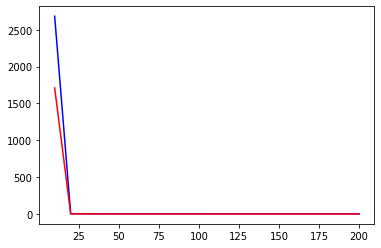

In [ ]:
# Cost from training on 10 first elements to 200 first elements

print('Polynomial Regression cost on the train set')
print(cost_ls[1:])
plt.plot([10, 20, 50, 100, 200], cost_ls[1:], c = 'b')

print('Polynomial Regression cost on the test set')
print(cost_test_ls[1:])
plt.plot([10, 20, 50, 100, 200], cost_test_ls[1:], c = 'r')